In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


def data_fix(x):
    if isinstance(x,str):
        return float(x.replace("$","").replace(",",""))
    else:
        return x
    
num_pipeline = Pipeline([
    ('imputer', Imputer(strategy="median")),
    ('std_scaler', StandardScaler()),
])


In [2]:
degrees = pd.read_csv("./college-salaries/degrees-that-pay-back.csv")

print(degrees.info())

strings = ["Undergraduate Major"]
label = "Undergraduate Major"
test = ["Percent change from Starting to Mid-Career Salary",
        "Mid-Career 10th Percentile Salary","Mid-Career 25th Percentile Salary",
        "Mid-Career 75th Percentile Salary","Mid-Career 90th Percentile Salary"]
x = degrees.drop(strings,axis=1)
#x = degrees[test].copy()
y = degrees[strings].copy()

for attrib in x.columns.values:
    print(attrib)
    x[attrib] = x[attrib].apply(data_fix)

x["1st feature"] = x["Mid-Career Median Salary"]/x["Starting Median Salary"]
x["2nd feature"] = x["Mid-Career 75th Percentile Salary"]/x["Mid-Career 25th Percentile Salary"]
x["3rd feature"] = x["Mid-Career 90th Percentile Salary"]/x["Mid-Career 10th Percentile Salary"]

x = x[["1st feature","2nd feature","3rd feature"]]

print(x.info())

x = num_pipeline.fit_transform(x)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
Undergraduate Major                                  50 non-null object
Starting Median Salary                               50 non-null object
Mid-Career Median Salary                             50 non-null object
Percent change from Starting to Mid-Career Salary    50 non-null float64
Mid-Career 10th Percentile Salary                    50 non-null object
Mid-Career 25th Percentile Salary                    50 non-null object
Mid-Career 75th Percentile Salary                    50 non-null object
Mid-Career 90th Percentile Salary                    50 non-null object
dtypes: float64(1), object(7)
memory usage: 3.2+ KB
None
Starting Median Salary
Mid-Career Median Salary
Percent change from Starting to Mid-Career Salary
Mid-Career 10th Percentile Salary
Mid-Career 25th Percentile Salary
Mid-Career 75th Percentile Salary
Mid-Career 90th Percentile Salary
<class 'pandas.core.frame.Data

In [2]:
ctype = pd.read_csv("./college-salaries/salaries-by-college-type.csv")

print(ctype.info())

strings = ["School Type","School Name"]
label = "School Type"
test = ["Starting Median Salary","Mid-Career 10th Percentile Salary","Mid-Career 75th Percentile Salary"]
x = ctype.drop(strings,axis=1)
#x = ctype[test].copy()
y = ctype[strings].copy()

for attrib in x.columns.values:
    print(attrib)
    x[attrib] = x[attrib].apply(data_fix)

x["1st feature"] = x["Mid-Career Median Salary"]/x["Starting Median Salary"]
x["2nd feature"] = x["Mid-Career 75th Percentile Salary"]/x["Mid-Career 25th Percentile Salary"]
x["3rd feature"] = x["Mid-Career 90th Percentile Salary"]/x["Mid-Career 10th Percentile Salary"]

print(x.info())

x = num_pipeline.fit_transform(x)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 8 columns):
School Name                          269 non-null object
School Type                          269 non-null object
Starting Median Salary               269 non-null object
Mid-Career Median Salary             269 non-null object
Mid-Career 10th Percentile Salary    231 non-null object
Mid-Career 25th Percentile Salary    269 non-null object
Mid-Career 75th Percentile Salary    269 non-null object
Mid-Career 90th Percentile Salary    231 non-null object
dtypes: object(8)
memory usage: 16.9+ KB
None
Starting Median Salary
Mid-Career Median Salary
Mid-Career 10th Percentile Salary
Mid-Career 25th Percentile Salary
Mid-Career 75th Percentile Salary
Mid-Career 90th Percentile Salary
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 9 columns):
Starting Median Salary               269 non-null float64
Mid-Career Median Salary             269 non-nul

In [12]:
region = pd.read_csv("./college-salaries/salaries-by-region.csv")

print(region.info())

strings = ["School Name","Region"]
label = "Region"
test = ["Starting Median Salary","Mid-Career 10th Percentile Salary","Mid-Career 75th Percentile Salary"]
x = region.drop(strings,axis=1)
#x = region[test].copy()
y = region[strings].copy()

for attrib in x.columns.values:
    print(attrib)
    x[attrib] = x[attrib].apply(data_fix)
    
print(x.info())

x = num_pipeline.fit_transform(x)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 8 columns):
School Name                          320 non-null object
Region                               320 non-null object
Starting Median Salary               320 non-null object
Mid-Career Median Salary             320 non-null object
Mid-Career 10th Percentile Salary    273 non-null object
Mid-Career 25th Percentile Salary    320 non-null object
Mid-Career 75th Percentile Salary    320 non-null object
Mid-Career 90th Percentile Salary    273 non-null object
dtypes: object(8)
memory usage: 20.1+ KB
None
Starting Median Salary
Mid-Career Median Salary
Mid-Career 10th Percentile Salary
Mid-Career 25th Percentile Salary
Mid-Career 75th Percentile Salary
Mid-Career 90th Percentile Salary
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 9 columns):
Starting Median Salary               320 non-null float64
Mid-Career Median Salary             320 non-nul

(19, 9)
8
175
47
20
[0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 3 3 1 1]
[2 2 2 2 2 0 2 2]
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 1]


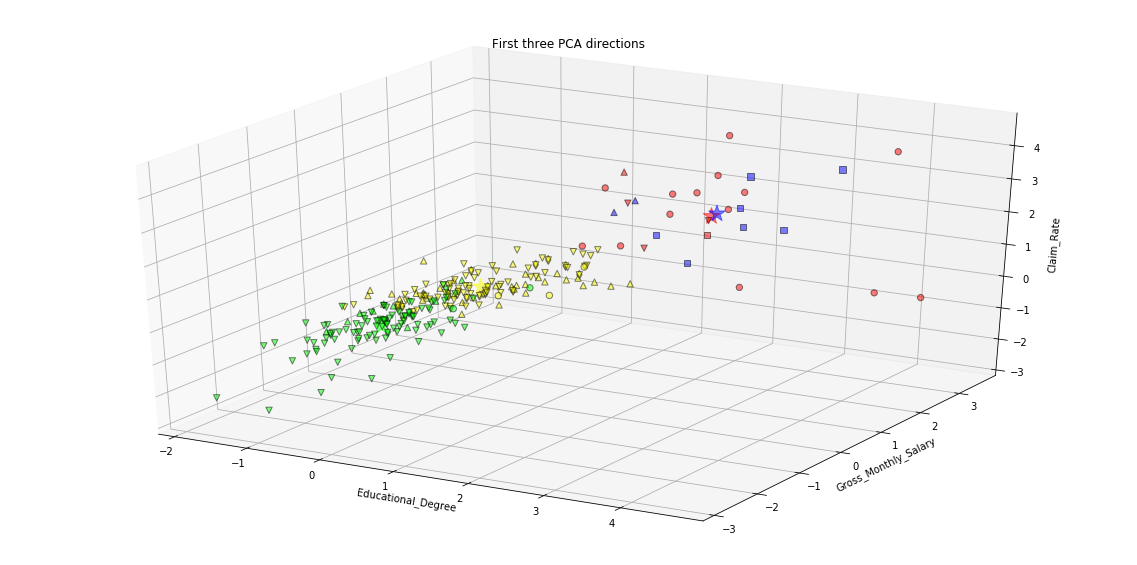

In [38]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(x)
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline  

#print(kmeans.cluster_centers_)
#print(y_pred)

#for i in range(0,k):
 #   print(i)
  #  for j in range(0,len(y)):
   #     if y_pred[j] == i:
    #        print("  "+y[label][j])

#print(list(y[label]))

d = {0:"#ff0000", 1:"#00ff00", 2:"#0000ff", 3:"#ffff00", 4:"#ff00ff", 5:"#ffff00", 6:"#ffffff", 7:"#000000"}

#markers = np.array(y[label])
#for i,value in enumerate(y[label]):
 #markers[i][0] = d[value]

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')

#print(y['School Type'] == 'Engineering')

from itertools import compress

fil = y['School Type'] == 'Engineering'
x_eng = np.array(list(compress(x, fil)))
y_pred_eng = np.array(list(compress(y_pred, fil)))
colors_eng = np.array([d[q] for q in y_pred_eng])
print(x_eng.shape)

fil = y['School Type'] == 'Ivy League'
x_ivy = np.array(list(compress(x, fil)))
y_pred_ivy = np.array(list(compress(y_pred, fil)))
colors_ivy = np.array([d[q] for q in y_pred_ivy])
print(len(x_ivy))

fil = y['School Type'] == 'State'
x_state = np.array(list(compress(x, fil)))
y_pred_state = np.array(list(compress(y_pred, fil)))
colors_state = np.array([d[q] for q in y_pred_state])
print(len(x_state))

fil = y['School Type'] == 'Liberal Arts'
x_la = np.array(list(compress(x, fil)))
y_pred_la = np.array(list(compress(y_pred, fil)))
colors_la = np.array([d[q] for q in y_pred_la])
print(len(x_la))

fil = y['School Type'] == 'Party'
x_party = np.array(list(compress(x, fil)))
y_pred_party = np.array(list(compress(y_pred, fil)))
colors_party = np.array([d[q] for q in y_pred_party])
print(len(x_party))

print(y_pred_eng)
print(y_pred_ivy)
print(y_pred_party)

ax.scatter(x_eng[:,0], x_eng[:,1], x_eng[:,2], c=colors_eng, cmap='viridis', edgecolor='k', s=40, alpha = 0.5, marker='o')
ax.scatter(x_ivy[:,0], x_ivy[:,1], x_ivy[:,2], c=colors_ivy, cmap='viridis', edgecolor='k', s=40, alpha = 0.5, marker='s')
ax.scatter(x_state[:,0], x_state[:,1], x_state[:,2], c=colors_state, cmap='viridis', edgecolor='k', s=40, alpha = 0.5, marker='v')
ax.scatter(x_la[:,0], x_la[:,1], x_la[:,2], c=colors_la, cmap='viridis', edgecolor='k', s=40, alpha = 0.5, marker='^')
ax.scatter(x_party[:,0], x_party[:,1], x_party[:,2], c=colors_party, cmap='viridis', edgecolor='k', s=40, alpha = 0.5, marker='d')

#ax.scatter(x[:,0], x[:,1], x[:,2], 
 #           c=y_pred, cmap='viridis',
  #          edgecolor='k', s=40, alpha = 0.5, marker=markers)


ax.set_title("First three PCA directions")
ax.set_xlabel("Educational_Degree")
ax.set_ylabel("Gross_Monthly_Salary")
ax.set_zlabel("Claim_Rate")
ax.dist = 10

colors_cluster = np.array([d[q] for q in range(0,k)])
ax.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
           kmeans.cluster_centers_[:,2], 
           s = 300, c = colors_cluster, marker='*', label = 'Centroid', alpha=0.5)

plt.autoscale(enable=True, axis='x', tight=True)    
